## Supervised Machine Learning

Supervised learning is where you have input variables (X) and an output variable (y) and you use an algorithm to learn the mapping function from the input to the output.

In [4]:
def f(X):
    pass
X = 0
#############


Y = f(X)

The goal is to approximate the real underlying mapping so well that when you have new input data (X), you can predict the output variables (y) for that data.

In [48]:
import pandas as pd
import numpy as np
# TSA from Statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

# Display and Plotting
import matplotlib.pylab as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.5f' % x) # pandas
np.set_printoptions(precision=5, suppress=True) # numpy

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# seaborn plotting style
sns.set(style='ticks', context='poster')

%matplotlib inline

/home/imen/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [180]:
Data

,Timestamp,load.avg_1_min,cpu.wait_perc,cpu.system_perc,mem.free_mb
0,1473180629.00000,0.24000,12.80000,0.60000,4272.00000
1,1473180659.00000,0.56000,13.00000,0.70000,4272.00000
2,1473180689.00000,1.13000,11.20000,0.60000,4271.00000
3,1473180719.00000,1.47000,10.30000,0.60000,4273.00000
4,1473180749.00000,1.29000,9.10000,0.70000,4272.00000
5,1473180779.00000,1.26000,9.20000,0.50000,4272.00000
6,1473180809.00000,1.40000,12.30000,0.60000,4272.00000
7,1473180839.00000,1.42000,12.00000,0.60000,4273.00000
8,1473180869.00000,1.34000,9.30000,0.70000,4271.00000
9,1473180899.00000,1.28000,9.30000,0.70000,4273.00000


In [181]:
Data = pd.read_csv('data_df.csv',sep=';')


X = Data['load.avg_1_min']

In [182]:
X[0:5]

0   0.24000
1   0.56000
2   1.13000
3   1.47000
4   1.29000
Name: load.avg_1_min, dtype: float64

It is called supervised learning because the process of an algorithm learning from the training dataset can be thought of as a teacher supervising the learning process.


We know the correct answers; the algorithm iteratively makes predictions on the training data and is corrected by making updates. Learning stops when the algorithm achieves an acceptable level of performance.

## Sliding Window For Time Series Data

Time series data can be phrased as supervised learning.

Given a sequence of numbers for a time series dataset, we can restructure the data to look like a supervised learning problem. We can do this by using previous time steps as input variables and use the next time step as the output variable.

In [21]:
X[0:5].values,  X[1:4].values

(array([ 0.24,  0.56,  1.13,  1.47,  1.29]), array([ 0.56,  1.13,  1.47]))

In [185]:
window = 1

[inputs,targets] = to_vect2(X[0:5],window)

A = [inputs,targets]
A

[array([[ 0.24],
        [ 0.56],
        [ 1.13],
        [ 1.47]]), array([ 0.56,  1.13,  1.47,  1.29])]

In [186]:
targets.shape

(4,)

In [187]:
targets=targets.reshape(-1,1)
targets
targets.shape

(4, 1)

In [189]:
# FeedForward Neural Net
from ann import ANN # Articial Neural Network


nn = ANN([window,20,1], activation_fun='tanh')


# Here please Try to represent the input data as percentage so that you can capture patterns

# train the ANN

nn.train(inputs,targets,10000)

# You can see the problem for solving the problem

(0, 1.0182929079195557)
(100, 0.19500676284942636)
(200, 0.17525430895028887)
(300, 0.169757361139902)
(400, 0.16726416013275267)
(500, 0.16584835262307732)
(600, 0.16493719733013879)
(700, 0.16430238961374879)
(800, 0.16383522461434405)
(900, 0.16347737945975538)
(1000, 0.16319475723874605)
(1100, 0.16296609069769391)
(1200, 0.16277742639422937)
(1300, 0.16261922977177945)
(1400, 0.16248476470137804)
(1500, 0.16236913752412549)
(1600, 0.1622687079493384)
(1700, 0.16218071239466259)
(1800, 0.16210301543687411)
(1900, 0.16203394125647216)
(2000, 0.16197215656604841)
(2100, 0.16191658756486677)
(2200, 0.16186635991601078)
(2300, 0.1618207546301767)
(2400, 0.16177917514769433)
(2500, 0.16174112243855635)
(2600, 0.16170617593211045)
(2700, 0.16167397874494566)
(2800, 0.16164422611857129)
(2900, 0.16161665628237826)
(3000, 0.16159104316903289)
(3100, 0.16156719055897273)
(3200, 0.16154492733768192)
(3300, 0.16152410362693914)
(3400, 0.16150458760802)
(3500, 0.16148626289687357)
(3600, 0.161

In [191]:
nn.predict([0.24])

[0.5604643222272567]

In [193]:
for x in inputs:
    print nn.predict(x)
    print "error:" nn.predict(x) - targets

[0.5604643222272567]
[0.998794416787803]
[0.9999997438774426]
[0.9999999878049353]


In [36]:
nn.predict(inputs[0])

[0.5675520960785483]

## Autocorrelation

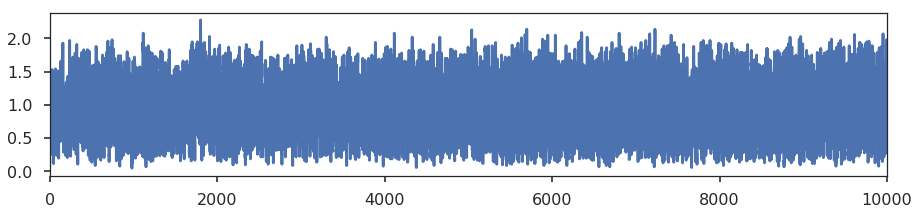

In [194]:
Data['load.avg_1_min'].plot(figsize=[15,3])

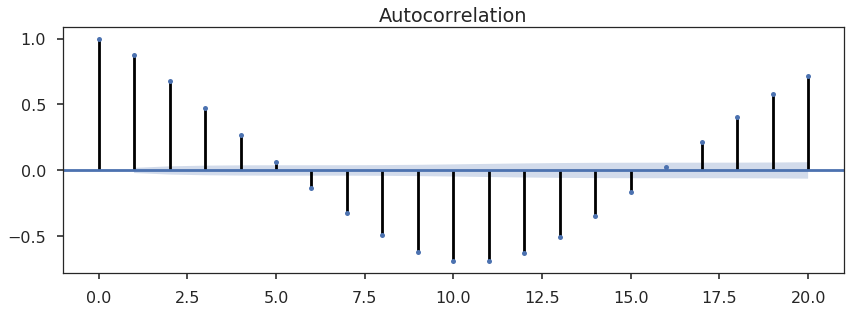

In [49]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Data['load.avg_1_min'], lags=20, ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout();

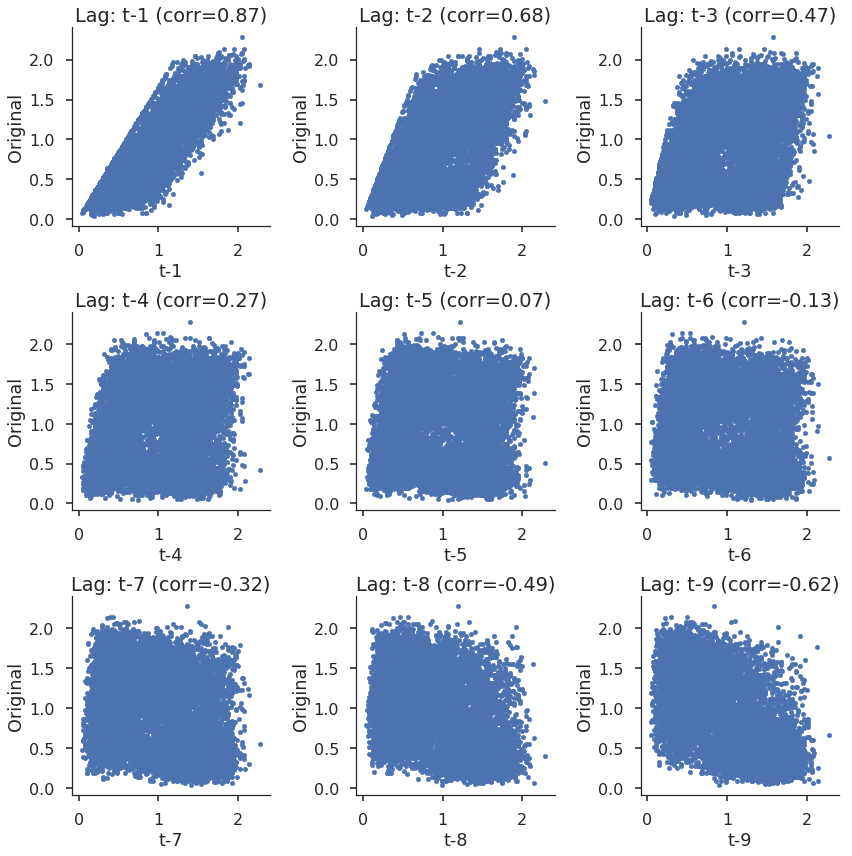

In [52]:
# Scatterplot matrix is another way to visualize the autocorrelation
# Its advantage is that it is very intuitive, as scatterplot (i.e. one of the plots in a scatterplot matrix) 
# is used often in practice

lags=11

ncols=3
nrows=int(np.ceil(lags/ncols))

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols, 4*nrows))

for ax, lag in zip(axes.flat, np.arange(1,lags+1, 1)):
    lag_str = 't-{}'.format(lag)
    X = (pd.concat([Data['load.avg_1_min'], Data['load.avg_1_min'].shift(-lag)], axis=1,
                   keys=['y'] + [lag_str]).dropna())

    X.plot(ax=ax, kind='scatter', y='y', x=lag_str);
    corr = X.corr().as_matrix()[0][1]
    ax.set_ylabel('Original')
    ax.set_title('Lag: {} (corr={:.2f})'.format(lag_str, corr));
    ax.set_aspect('equal');
    sns.despine();

fig.tight_layout();

## Sliding Window With Multivariate Time Series Data

Traditionally, different names are used:

- Univariate Time Series: These are datasets where only a single variable is observed at each time, such as temperature each hour. The example in the previous section is a univariate time series dataset.

- Multivariate Time Series: These are datasets where two or more variables are observed at each time.


"Multivariate time series analysis considers simultaneously multiple time series. … It is, in general, much more complicated than univariate time series analysis"

In [55]:
Data.head()

,Timestamp,load.avg_1_min,cpu.wait_perc,cpu.system_perc,mem.free_mb
0,1473180629.00000,0.24000,12.80000,0.60000,4272.00000
1,1473180659.00000,0.56000,13.00000,0.70000,4272.00000
2,1473180689.00000,1.13000,11.20000,0.60000,4271.00000
3,1473180719.00000,1.47000,10.30000,0.60000,4273.00000
4,1473180749.00000,1.29000,9.10000,0.70000,4272.00000


This means that we will use the previous time step values of `load.avg_1_min` and `cpu.wait_perc`. We will also have available the next time step value for `load.avg_1_min`. We will then predict the next time step value of `cpu.wait_perc`.

In [195]:
Data_tmp = Data[['load.avg_1_min','cpu.wait_perc','cpu.system_perc']].head(30)

In [196]:
Data_tmp.head()

,load.avg_1_min,cpu.wait_perc,cpu.system_perc
0,0.24000,12.80000,0.60000
1,0.56000,13.00000,0.70000
2,1.13000,11.20000,0.60000
3,1.47000,10.30000,0.60000
4,1.29000,9.10000,0.70000


In [199]:
Data_tmp['y'] = Data_tmp['cpu.wait_perc']

Data_tmp['load.avg_1_min'] = Data_tmp['load.avg_1_min'].shift(1)
Data_tmp['cpu.wait_perc'] = Data_tmp['cpu.wait_perc'].shift(1)
Data_tmp['cpu.system_perc'] = Data_tmp['cpu.system_perc'].shift(1)


In [200]:
Data_tmp.head()

,load.avg_1_min,cpu.wait_perc,cpu.system_perc,y
0,nan,nan,nan,12.80000
1,0.24000,12.80000,0.60000,13.00000
2,0.56000,13.00000,0.70000,11.20000
3,1.13000,11.20000,0.60000,10.30000
4,1.47000,10.30000,0.60000,9.10000


In [201]:
Data_tmp.fillna(inplace=True,method='backfill')

In [202]:
dataset = Data_tmp.iloc[1:,:].values
dataset = dataset.astype('float32')
dataset

array([[  0.24,  12.8 ,   0.6 ,  13.  ],
       [  0.56,  13.  ,   0.7 ,  11.2 ],
       [  1.13,  11.2 ,   0.6 ,  10.3 ],
       [  1.47,  10.3 ,   0.6 ,   9.1 ],
       [  1.29,   9.1 ,   0.7 ,   9.2 ],
       [  1.26,   9.2 ,   0.5 ,  12.3 ],
       [  1.4 ,  12.3 ,   0.6 ,  12.  ],
       [  1.42,  12.  ,   0.6 ,   9.3 ],
       [  1.34,   9.3 ,   0.7 ,   9.3 ],
       [  1.28,   9.3 ,   0.7 ,   9.2 ],
       [  1.04,   9.2 ,   0.6 ,   9.7 ],
       [  0.89,   9.7 ,   0.4 ,   9.4 ],
       [  0.8 ,   9.4 ,   0.6 ,  10.2 ],
       [  0.48,  10.2 ,   0.6 ,  13.2 ],
       [  0.87,  13.2 ,   0.5 ,  11.6 ],
       [  0.99,  11.6 ,   0.6 ,   9.5 ],
       [  0.91,   9.5 ,   0.6 ,   9.9 ],
       [  0.69,   9.9 ,   0.4 ,  14.2 ],
       [  0.42,  14.2 ,   0.7 ,  14.2 ],
       [  0.62,  14.2 ,   0.5 ,  14.3 ],
       [  0.38,  14.3 ,   0.6 ,  12.8 ],
       [  0.41,  12.8 ,   0.5 ,   9.2 ],
       [  0.73,   9.2 ,   0.6 ,   9.1 ],
       [  1.23,   9.1 ,   0.6 ,   9.1 ],
       [  1.53, 

### a -  Preprocessing: Normalizing the data

In [132]:
# And Scikit-Learn
from sklearn.preprocessing import MinMaxScaler

In [203]:
# normalize the dataset thanks to scikit-learn
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
dataset;

In [204]:
dataset

array([[ 0.     ,  0.71154,  0.66667,  0.75   ],
       [ 0.24806,  0.75   ,  1.     ,  0.40385],
       [ 0.68992,  0.40385,  0.66667,  0.23077],
       [ 0.95349,  0.23077,  0.66667,  0.     ],
       [ 0.81395,  0.     ,  1.     ,  0.01923],
       [ 0.7907 ,  0.01923,  0.33333,  0.61538],
       [ 0.89922,  0.61538,  0.66667,  0.55769],
       [ 0.91473,  0.55769,  0.66667,  0.03846],
       [ 0.85271,  0.03846,  1.     ,  0.03846],
       [ 0.8062 ,  0.03846,  1.     ,  0.01923],
       [ 0.62015,  0.01923,  0.66667,  0.11538],
       [ 0.50388,  0.11538,  0.     ,  0.05769],
       [ 0.43411,  0.05769,  0.66667,  0.21154],
       [ 0.18605,  0.21154,  0.66667,  0.78846],
       [ 0.48837,  0.78846,  0.33333,  0.48077],
       [ 0.5814 ,  0.48077,  0.66667,  0.07692],
       [ 0.51938,  0.07692,  0.66667,  0.15385],
       [ 0.34884,  0.15385,  0.     ,  0.98077],
       [ 0.13953,  0.98077,  1.     ,  0.98077],
       [ 0.29457,  0.98077,  0.33333,  1.     ],
       [ 0.10853,  1

### b - spliting the data for futur testing 

In [205]:
# split into train and test sets
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

(20, 9)


In [206]:
print("Train:\n\n\n {}, \n\n\nTest:\n\n\n {} ".format(train, test))

Train:


 [[ 0.       0.71154  0.66667  0.75   ]
 [ 0.24806  0.75     1.       0.40385]
 [ 0.68992  0.40385  0.66667  0.23077]
 [ 0.95349  0.23077  0.66667  0.     ]
 [ 0.81395  0.       1.       0.01923]
 [ 0.7907   0.01923  0.33333  0.61538]
 [ 0.89922  0.61538  0.66667  0.55769]
 [ 0.91473  0.55769  0.66667  0.03846]
 [ 0.85271  0.03846  1.       0.03846]
 [ 0.8062   0.03846  1.       0.01923]
 [ 0.62015  0.01923  0.66667  0.11538]
 [ 0.50388  0.11538  0.       0.05769]
 [ 0.43411  0.05769  0.66667  0.21154]
 [ 0.18605  0.21154  0.66667  0.78846]
 [ 0.48837  0.78846  0.33333  0.48077]
 [ 0.5814   0.48077  0.66667  0.07692]
 [ 0.51938  0.07692  0.66667  0.15385]
 [ 0.34884  0.15385  0.       0.98077]
 [ 0.13953  0.98077  1.       0.98077]
 [ 0.29457  0.98077  0.33333  1.     ]], 


Test:


 [[ 0.10853  1.       0.66667  0.71154]
 [ 0.13178  0.71154  0.33333  0.01923]
 [ 0.37984  0.01923  0.66667  0.     ]
 [ 0.76744  0.       0.66667  0.     ]
 [ 1.       0.       0.66667  0.03846]
 

### c - Creating a new DataSet with look_back

Done ! 

In [136]:
trainX, trainY = train[:,0:3], train[:,-1]
testX, testY = test[:,0:3], test[:,-1]

In [208]:
trainX, trainY

(array([[ 0.     ,  0.71154,  0.66667],
        [ 0.24806,  0.75   ,  1.     ],
        [ 0.68992,  0.40385,  0.66667],
        [ 0.95349,  0.23077,  0.66667],
        [ 0.81395,  0.     ,  1.     ],
        [ 0.7907 ,  0.01923,  0.33333],
        [ 0.89922,  0.61538,  0.66667],
        [ 0.91473,  0.55769,  0.66667],
        [ 0.85271,  0.03846,  1.     ],
        [ 0.8062 ,  0.03846,  1.     ],
        [ 0.62015,  0.01923,  0.66667],
        [ 0.50388,  0.11538,  0.     ],
        [ 0.43411,  0.05769,  0.66667],
        [ 0.18605,  0.21154,  0.66667],
        [ 0.48837,  0.78846,  0.33333],
        [ 0.5814 ,  0.48077,  0.66667],
        [ 0.51938,  0.07692,  0.66667],
        [ 0.34884,  0.15385,  0.     ],
        [ 0.13953,  0.98077,  1.     ]], dtype=float32), array([[ 0.75   ],
        [ 0.40385],
        [ 0.23077],
        [ 0.     ],
        [ 0.01923],
        [ 0.61538],
        [ 0.55769],
        [ 0.03846],
        [ 0.03846],
        [ 0.01923],
        [ 0.11538],
    

In [209]:
testX, testY

(array([[ 0.29457,  0.98077,  0.33333],
        [ 0.10853,  1.     ,  0.66667],
        [ 0.13178,  0.71154,  0.33333],
        [ 0.37984,  0.01923,  0.66667],
        [ 0.76744,  0.     ,  0.66667],
        [ 1.     ,  0.     ,  0.66667],
        [ 0.91473,  0.03846,  1.     ],
        [ 0.86822,  0.05769,  0.33333],
        [ 0.8062 ,  0.09615,  0.33333],
        [ 0.49612,  0.11538,  0.66667]], dtype=float32),
 array([ 1.     ,  0.71154,  0.01923,  0.     ,  0.     ,  0.03846,
         0.05769,  0.09615,  0.11538,  0.53846], dtype=float32))

In [137]:
trainY = trainY.reshape(-1,1)

In [210]:
nn.train(trainX,trainY,10000)

(0, 6.7815244409551605)
(100, 5.115407510124955)
(200, 5.1147289357731136)
(300, 5.1137808450332987)
(400, 5.1123555782167012)
(500, 5.1099427259129007)
(600, 5.1047941497216121)
(700, 5.0820014131506808)
(800, 0.70688389487404069)
(900, 0.69204356552685087)
(1000, 0.68027937918718084)
(1100, 0.67543430802368287)
(1200, 0.67379323745333541)
(1300, 0.67292598611774235)
(1400, 0.67184572422456879)
(1500, 0.66952593179096975)
(1600, 0.6633665327348981)
(1700, 0.64774589422256423)
(1800, 0.62004782593395413)
(1900, 0.5913513649747848)
(2000, 0.57431132088794956)
(2100, 0.56648029196366223)
(2200, 0.56222130558676198)
(2300, 0.55919081979814378)
(2400, 0.55665100797896061)
(2500, 0.55436114393671199)
(2600, 0.55223353770773842)
(2700, 0.55023401262360039)
(2800, 0.54834905820293844)
(2900, 0.54657182550553252)
(3000, 0.54489619498471986)
(3100, 0.5433152549958481)
(3200, 0.54182155136895971)
(3300, 0.54040764111495976)
(3400, 0.53906647664088236)
(3500, 0.53779158856610032)
(3600, 0.5365771

In [212]:
trainX[0]

array([ 0.     ,  0.71154,  0.66667], dtype=float32)

In [213]:
nn.predict([ 0.     ,  0.71154,  0.66667])

[0.8081706256569063]

In [214]:
for X in testX:
    print nn.predict(X)

[0.739734270146225]
[0.8066383263215832]
[0.8051917289050019]
[0.5817687157200974]
[0.11746741540205692]
[0.12752067400278316]
[0.1230452972293653]
[0.12078391711663831]
[0.11831964184076006]
[0.2635800694524076]


In [217]:
sum_error = 0

for X,y in zip(testX,testY):
    print("prediction : {}, ground truth {} ".format(nn.predict(X),y))
    print("Error = {} ".format(np.abs(nn.predict(X)-y)))
    
    sum_error += np.abs(nn.predict(X)-y)

print np.sqrt(sum_error/len(textX))

prediction : [0.739734270146225], ground truth 0.999999880791 
Error = [ 0.26027] 
prediction : [0.8066383263215832], ground truth 0.711538434029 
Error = [ 0.0951] 
prediction : [0.8051917289050019], ground truth 0.0192306041718 
Error = [ 0.78596] 
prediction : [0.5817687157200974], ground truth 0.0 
Error = [ 0.58177] 
prediction : [0.11746741540205692], ground truth 0.0 
Error = [ 0.11747] 
prediction : [0.12752067400278316], ground truth 0.0384614467621 
Error = [ 0.08906] 
prediction : [0.1230452972293653], ground truth 0.0576921701431 
Error = [ 0.06535] 
prediction : [0.12078391711663831], ground truth 0.0961538553238 
Error = [ 0.02463] 
prediction : [0.11831964184076006], ground truth 0.115384459496 
Error = [ 0.00294] 
prediction : [0.2635800694524076], ground truth 0.538461327553 
Error = [ 0.27488] 
[ 2.29742]


## With Keras and Tensorflow

In [218]:
import numpy
import matplotlib.pyplot as plt
import pandas



from keras.layers import Dense

In [232]:
#create and fit Multilayer Perceptron model
look_back = 1

model = Sequential()
model.add(Dense(8, input_dim=3, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [233]:
trainX.shape

(19, 3)

In [234]:
nn.train

<bound method ANN.train of <ann.ANN instance at 0x7fe2b07cb050>>

In [246]:
model.fit(trainX, trainY,  nb_epoch=2000, batch_size=2, verbose=2)

Epoch 1/2000
0s - loss: 0.0355
Epoch 2/2000
0s - loss: 0.0348
Epoch 3/2000
0s - loss: 0.0351
Epoch 4/2000
0s - loss: 0.0349
Epoch 5/2000
0s - loss: 0.0349
Epoch 6/2000
0s - loss: 0.0350
Epoch 7/2000
0s - loss: 0.0351
Epoch 8/2000
0s - loss: 0.0350
Epoch 9/2000
0s - loss: 0.0350
Epoch 10/2000
0s - loss: 0.0350
Epoch 11/2000
0s - loss: 0.0355
Epoch 12/2000
0s - loss: 0.0349
Epoch 13/2000
0s - loss: 0.0349
Epoch 14/2000
0s - loss: 0.0349
Epoch 15/2000
0s - loss: 0.0348
Epoch 16/2000
0s - loss: 0.0349
Epoch 17/2000
0s - loss: 0.0349
Epoch 18/2000
0s - loss: 0.0349
Epoch 19/2000
0s - loss: 0.0348
Epoch 20/2000
0s - loss: 0.0349
Epoch 21/2000
0s - loss: 0.0347
Epoch 22/2000
0s - loss: 0.0349
Epoch 23/2000
0s - loss: 0.0349
Epoch 24/2000
0s - loss: 0.0348
Epoch 25/2000
0s - loss: 0.0354
Epoch 26/2000
0s - loss: 0.0348
Epoch 27/2000
0s - loss: 0.0350
Epoch 28/2000
0s - loss: 0.0352
Epoch 29/2000
0s - loss: 0.0350
Epoch 30/2000
0s - loss: 0.0350
Epoch 31/2000
0s - loss: 0.0348
Epoch 32/2000
0s 

0s - loss: 0.0344
Epoch 262/2000
0s - loss: 0.0341
Epoch 263/2000
0s - loss: 0.0341
Epoch 264/2000
0s - loss: 0.0345
Epoch 265/2000
0s - loss: 0.0341
Epoch 266/2000
0s - loss: 0.0339
Epoch 267/2000
0s - loss: 0.0341
Epoch 268/2000
0s - loss: 0.0346
Epoch 269/2000
0s - loss: 0.0343
Epoch 270/2000
0s - loss: 0.0341
Epoch 271/2000
0s - loss: 0.0343
Epoch 272/2000
0s - loss: 0.0342
Epoch 273/2000
0s - loss: 0.0343
Epoch 274/2000
0s - loss: 0.0341
Epoch 275/2000
0s - loss: 0.0341
Epoch 276/2000
0s - loss: 0.0342
Epoch 277/2000
0s - loss: 0.0339
Epoch 278/2000
0s - loss: 0.0340
Epoch 279/2000
0s - loss: 0.0341
Epoch 280/2000
0s - loss: 0.0341
Epoch 281/2000
0s - loss: 0.0341
Epoch 282/2000
0s - loss: 0.0340
Epoch 283/2000
0s - loss: 0.0341
Epoch 284/2000
0s - loss: 0.0342
Epoch 285/2000
0s - loss: 0.0343
Epoch 286/2000
0s - loss: 0.0341
Epoch 287/2000
0s - loss: 0.0343
Epoch 288/2000
0s - loss: 0.0341
Epoch 289/2000
0s - loss: 0.0341
Epoch 290/2000
0s - loss: 0.0340
Epoch 291/2000
0s - loss:

0s - loss: 0.0336
Epoch 518/2000
0s - loss: 0.0335
Epoch 519/2000
0s - loss: 0.0337
Epoch 520/2000
0s - loss: 0.0334
Epoch 521/2000
0s - loss: 0.0338
Epoch 522/2000
0s - loss: 0.0333
Epoch 523/2000
0s - loss: 0.0332
Epoch 524/2000
0s - loss: 0.0333
Epoch 525/2000
0s - loss: 0.0335
Epoch 526/2000
0s - loss: 0.0334
Epoch 527/2000
0s - loss: 0.0334
Epoch 528/2000
0s - loss: 0.0333
Epoch 529/2000
0s - loss: 0.0337
Epoch 530/2000
0s - loss: 0.0334
Epoch 531/2000
0s - loss: 0.0333
Epoch 532/2000
0s - loss: 0.0333
Epoch 533/2000
0s - loss: 0.0332
Epoch 534/2000
0s - loss: 0.0335
Epoch 535/2000
0s - loss: 0.0344
Epoch 536/2000
0s - loss: 0.0333
Epoch 537/2000
0s - loss: 0.0336
Epoch 538/2000
0s - loss: 0.0332
Epoch 539/2000
0s - loss: 0.0331
Epoch 540/2000
0s - loss: 0.0332
Epoch 541/2000
0s - loss: 0.0334
Epoch 542/2000
0s - loss: 0.0333
Epoch 543/2000
0s - loss: 0.0332
Epoch 544/2000
0s - loss: 0.0333
Epoch 545/2000
0s - loss: 0.0333
Epoch 546/2000
0s - loss: 0.0338
Epoch 547/2000
0s - loss:

0s - loss: 0.0326
Epoch 771/2000
0s - loss: 0.0327
Epoch 772/2000
0s - loss: 0.0328
Epoch 773/2000
0s - loss: 0.0327
Epoch 774/2000
0s - loss: 0.0328
Epoch 775/2000
0s - loss: 0.0327
Epoch 776/2000
0s - loss: 0.0328
Epoch 777/2000
0s - loss: 0.0327
Epoch 778/2000
0s - loss: 0.0326
Epoch 779/2000
0s - loss: 0.0326
Epoch 780/2000
0s - loss: 0.0332
Epoch 781/2000
0s - loss: 0.0332
Epoch 782/2000
0s - loss: 0.0331
Epoch 783/2000
0s - loss: 0.0326
Epoch 784/2000
0s - loss: 0.0325
Epoch 785/2000
0s - loss: 0.0325
Epoch 786/2000
0s - loss: 0.0327
Epoch 787/2000
0s - loss: 0.0326
Epoch 788/2000
0s - loss: 0.0327
Epoch 789/2000
0s - loss: 0.0330
Epoch 790/2000
0s - loss: 0.0324
Epoch 791/2000
0s - loss: 0.0325
Epoch 792/2000
0s - loss: 0.0328
Epoch 793/2000
0s - loss: 0.0324
Epoch 794/2000
0s - loss: 0.0326
Epoch 795/2000
0s - loss: 0.0331
Epoch 796/2000
0s - loss: 0.0327
Epoch 797/2000
0s - loss: 0.0326
Epoch 798/2000
0s - loss: 0.0330
Epoch 799/2000
0s - loss: 0.0325
Epoch 800/2000
0s - loss:

0s - loss: 0.0323
Epoch 1025/2000
0s - loss: 0.0321
Epoch 1026/2000
0s - loss: 0.0319
Epoch 1027/2000
0s - loss: 0.0321
Epoch 1028/2000
0s - loss: 0.0328
Epoch 1029/2000
0s - loss: 0.0319
Epoch 1030/2000
0s - loss: 0.0319
Epoch 1031/2000
0s - loss: 0.0320
Epoch 1032/2000
0s - loss: 0.0324
Epoch 1033/2000
0s - loss: 0.0322
Epoch 1034/2000
0s - loss: 0.0318
Epoch 1035/2000
0s - loss: 0.0320
Epoch 1036/2000
0s - loss: 0.0317
Epoch 1037/2000
0s - loss: 0.0323
Epoch 1038/2000
0s - loss: 0.0319
Epoch 1039/2000
0s - loss: 0.0325
Epoch 1040/2000
0s - loss: 0.0319
Epoch 1041/2000
0s - loss: 0.0322
Epoch 1042/2000
0s - loss: 0.0319
Epoch 1043/2000
0s - loss: 0.0318
Epoch 1044/2000
0s - loss: 0.0318
Epoch 1045/2000
0s - loss: 0.0319
Epoch 1046/2000
0s - loss: 0.0318
Epoch 1047/2000
0s - loss: 0.0321
Epoch 1048/2000
0s - loss: 0.0320
Epoch 1049/2000
0s - loss: 0.0319
Epoch 1050/2000
0s - loss: 0.0318
Epoch 1051/2000
0s - loss: 0.0325
Epoch 1052/2000
0s - loss: 0.0322
Epoch 1053/2000
0s - loss: 0.0

0s - loss: 0.0313
Epoch 1267/2000
0s - loss: 0.0313
Epoch 1268/2000
0s - loss: 0.0314
Epoch 1269/2000
0s - loss: 0.0312
Epoch 1270/2000
0s - loss: 0.0314
Epoch 1271/2000
0s - loss: 0.0314
Epoch 1272/2000
0s - loss: 0.0313
Epoch 1273/2000
0s - loss: 0.0312
Epoch 1274/2000
0s - loss: 0.0311
Epoch 1275/2000
0s - loss: 0.0317
Epoch 1276/2000
0s - loss: 0.0316
Epoch 1277/2000
0s - loss: 0.0313
Epoch 1278/2000
0s - loss: 0.0314
Epoch 1279/2000
0s - loss: 0.0318
Epoch 1280/2000
0s - loss: 0.0312
Epoch 1281/2000
0s - loss: 0.0313
Epoch 1282/2000
0s - loss: 0.0314
Epoch 1283/2000
0s - loss: 0.0313
Epoch 1284/2000
0s - loss: 0.0314
Epoch 1285/2000
0s - loss: 0.0312
Epoch 1286/2000
0s - loss: 0.0312
Epoch 1287/2000
0s - loss: 0.0311
Epoch 1288/2000
0s - loss: 0.0312
Epoch 1289/2000
0s - loss: 0.0315
Epoch 1290/2000
0s - loss: 0.0313
Epoch 1291/2000
0s - loss: 0.0310
Epoch 1292/2000
0s - loss: 0.0314
Epoch 1293/2000
0s - loss: 0.0312
Epoch 1294/2000
0s - loss: 0.0312
Epoch 1295/2000
0s - loss: 0.0

0s - loss: 0.0308
Epoch 1509/2000
0s - loss: 0.0306
Epoch 1510/2000
0s - loss: 0.0306
Epoch 1511/2000
0s - loss: 0.0322
Epoch 1512/2000
0s - loss: 0.0308
Epoch 1513/2000
0s - loss: 0.0306
Epoch 1514/2000
0s - loss: 0.0312
Epoch 1515/2000
0s - loss: 0.0308
Epoch 1516/2000
0s - loss: 0.0307
Epoch 1517/2000
0s - loss: 0.0307
Epoch 1518/2000
0s - loss: 0.0306
Epoch 1519/2000
0s - loss: 0.0306
Epoch 1520/2000
0s - loss: 0.0306
Epoch 1521/2000
0s - loss: 0.0309
Epoch 1522/2000
0s - loss: 0.0314
Epoch 1523/2000
0s - loss: 0.0306
Epoch 1524/2000
0s - loss: 0.0308
Epoch 1525/2000
0s - loss: 0.0306
Epoch 1526/2000
0s - loss: 0.0308
Epoch 1527/2000
0s - loss: 0.0306
Epoch 1528/2000
0s - loss: 0.0307
Epoch 1529/2000
0s - loss: 0.0307
Epoch 1530/2000
0s - loss: 0.0307
Epoch 1531/2000
0s - loss: 0.0306
Epoch 1532/2000
0s - loss: 0.0307
Epoch 1533/2000
0s - loss: 0.0308
Epoch 1534/2000
0s - loss: 0.0306
Epoch 1535/2000
0s - loss: 0.0306
Epoch 1536/2000
0s - loss: 0.0306
Epoch 1537/2000
0s - loss: 0.0

0s - loss: 0.0301
Epoch 1753/2000
0s - loss: 0.0301
Epoch 1754/2000
0s - loss: 0.0301
Epoch 1755/2000
0s - loss: 0.0306
Epoch 1756/2000
0s - loss: 0.0305
Epoch 1757/2000
0s - loss: 0.0303
Epoch 1758/2000
0s - loss: 0.0301
Epoch 1759/2000
0s - loss: 0.0301
Epoch 1760/2000
0s - loss: 0.0301
Epoch 1761/2000
0s - loss: 0.0304
Epoch 1762/2000
0s - loss: 0.0301
Epoch 1763/2000
0s - loss: 0.0300
Epoch 1764/2000
0s - loss: 0.0300
Epoch 1765/2000
0s - loss: 0.0300
Epoch 1766/2000
0s - loss: 0.0302
Epoch 1767/2000
0s - loss: 0.0302
Epoch 1768/2000
0s - loss: 0.0302
Epoch 1769/2000
0s - loss: 0.0301
Epoch 1770/2000
0s - loss: 0.0302
Epoch 1771/2000
0s - loss: 0.0303
Epoch 1772/2000
0s - loss: 0.0300
Epoch 1773/2000
0s - loss: 0.0300
Epoch 1774/2000
0s - loss: 0.0299
Epoch 1775/2000
0s - loss: 0.0303
Epoch 1776/2000
0s - loss: 0.0302
Epoch 1777/2000
0s - loss: 0.0302
Epoch 1778/2000
0s - loss: 0.0301
Epoch 1779/2000
0s - loss: 0.0301
Epoch 1780/2000
0s - loss: 0.0301
Epoch 1781/2000
0s - loss: 0.0

0s - loss: 0.0298
Epoch 1998/2000
0s - loss: 0.0295
Epoch 1999/2000
0s - loss: 0.0298
Epoch 2000/2000
0s - loss: 0.0297


In [236]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
 


In [237]:
trainP = model.predict(trainX)
testP = model.predict(testX)

In [238]:
Data_tmp.head()

,load.avg_1_min,cpu.wait_perc,cpu.system_perc,y
0,0.24000,12.80000,0.60000,12.80000
1,0.24000,12.80000,0.60000,13.00000
2,0.56000,13.00000,0.70000,11.20000
3,1.13000,11.20000,0.60000,10.30000
4,1.47000,10.30000,0.60000,9.10000


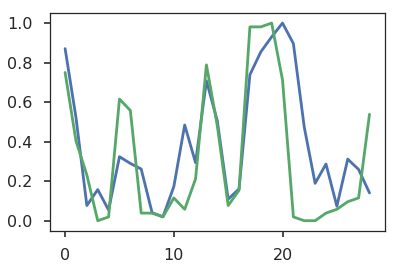

In [247]:
trainP = model.predict(trainX)
testP = model.predict(testX)
plt.plot(np.concatenate((trainP,testP)))
plt.plot(dataset[:,3])

In [ ]:
for t in trainX:
    model.predict(t)

In [253]:
model.predict(trainX)

array([[ 0.87069],
       [ 0.52187],
       [ 0.07677],
       [ 0.1574 ],
       [ 0.05416],
       [ 0.32388],
       [ 0.28995],
       [ 0.26136],
       [ 0.04088],
       [ 0.01994],
       [ 0.17233],
       [ 0.48423],
       [ 0.29365],
       [ 0.70793],
       [ 0.50545],
       [ 0.10891],
       [ 0.16109],
       [ 0.7389 ],
       [ 0.85405]], dtype=float32)

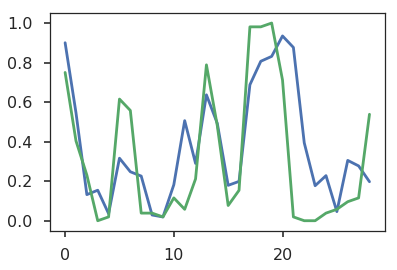

In [243]:
trainP = model.predict(trainX)
testP = model.predict(testX)
plt.plot(np.concatenate((trainP,testP)))
plt.plot(dataset[:,3])

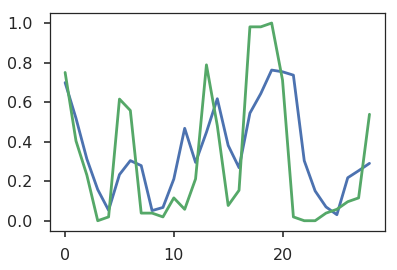

In [241]:
trainP = model.predict(trainX)
testP = model.predict(testX)
plt.plot(np.concatenate((trainP,testP)))
plt.plot(dataset[:,3])

<function matplotlib.pyplot.show>

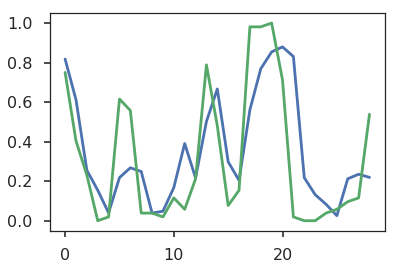

In [177]:
plt.plot(np.concatenate((trainPredict,testPredict)))
plt.plot(dataset[:,-1])
plt.show

In [245]:
import math
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.03 MSE (0.19 RMSE)
Test Score: 0.12 MSE (0.35 RMSE)


Train Score: 0.05 MSE (0.21 RMSE)
Test Score: 0.09 MSE (0.30 RMSE)

Image(filename = "prediction_example.png", width=100, height=100)

Train Score: 0.12 MSE (0.35 RMSE)
Test Score: 0.11 MSE (0.33 RMSE)

In [254]:
import math
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.03 MSE (0.17 RMSE)
Test Score: 0.14 MSE (0.37 RMSE)


More info ==> http://www.ulb.ac.be/di/map/gbonte/ftp/time_ser.pdf

And ==> http://web.engr.oregonstate.edu/~tgd/publications/mlsd-ssspr.pdf

## Index and util functions

In [22]:
def to_vect2(X,w):
    inputs = [[X[i+e] for e in range(w)] for i in range(len(X)-w)]
    targets = [X[j+w] for j in range(len(X)-w)]
    
    return np.array(inputs),np.array(targets)